In [3]:
import math
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import statistics as st

In [4]:
ambcsv = pd.read_csv('/home/uscheed/Downloads/Ambulatory_Surgical_Measures-Facility.csv', encoding='cp1252')
asccsv = pd.read_csv('/home/uscheed/Downloads/asc_CCN_pr16q4_17q3.csv', encoding='cp1252')
timeffcsv = pd.read_csv('/home/uscheed/Downloads/Timely and Effective Care - Hospital.csv', encoding='cp1252')
ipfqrcsv = pd.read_csv('/home/uscheed/Downloads/IPFQR_FUH_QualityMeasures_Facility.csv', encoding='cp1252')
dodcsv = pd.DataFrame(pd.read_csv('/home/uscheed/Downloads/DoD_TRISS_Data_20180424.csv', encoding='cp1252'))

print("number of hospitals:", len(pd.unique(dodcsv['Hospital Name'])))
print("hospitals:", pd.unique(dodcsv['Hospital Name']))


number of hospitals: 36
hospitals: ['BASSETT ARMY COMMUNITY HOSPITAL, FT. WAINWRIGHT'
 '673RD MEDICAL GROUP, ELMENDORF'
 '60th MEDICAL GROUP, DAVID GRANT MEDICAL CENTER, TRAVIS'
 'NAVAL HOSPITAL CAMP PENDLETON' 'NAVAL MEDICAL CENTER SAN DIEGO'
 'NAVAL HOSPITAL TWENTYNINE PALMS' 'EVANS ARMY MEDICAL CENTER, FT. CARSON'
 'NAVAL HOSPITAL PENSACOLA' 'NAVAL HOSPITAL JACKSONVILLE'
 '96TH MEDICAL GROUP, EGLIN' 'EISENHOWER ARMY MEDICAL CENTER, FT. GORDON'
 'MARTIN ARMY COMMUNITY HOSPITAL, FT. BENNING'
 'WINN ARMY COMMUNITY HOSPITAL, FT. STEWART'
 'TRIPLER ARMY MEDICAL CENTER, FT. SHAFTER'
 'IRWIN ARMY COMMUNITY HOSPITAL, FT. RILEY'
 'BLANCHFIELD ARMY COMMUNITY HOSPITAL, FT. CAMPBELL'
 'BAYNES JONES ARMY COMMUNITY HOSPITAL, FT. POLK'
 'WALTER REED NATIONAL MEDICAL CENTER, BETHESDA'
 '81ST MEDICAL GROUP, KEESLER'
 'GENERAL LEONARD WOOD ARMY COMMUNITY HOSPITAL, FT. LEONARD WOOD'
 "99TH MEDICAL GROUP, O'CALLAGHAN HOSPITAL, NELLIS"
 'KELLER ARMY COMMUNITY HOSPITAL, WEST POINT'
 'WOMACK ARMY MEDICAL 

In [9]:
doddf = pd.DataFrame()
doddf['Hospital Name'] = dodcsv['Hospital Name']
doddf['Address'] = dodcsv['Address']
doddf['City'] = dodcsv['City']
doddf['State'] = dodcsv['State']
doddf['ZIP Code'] = dodcsv['ZIP Code']
doddf['Survey Question'] = dodcsv['Survey Question']
doddf['Patient Survey Star Rating'] = dodcsv['Patient Survey Star Rating']

In [10]:
doddf[doddf['Survey Question'].str.contains("star rating")]
notapp = doddf[doddf['Patient Survey Star Rating'].str.contains("Not Applicable") == False]
finaldod = notapp[notapp['Patient Survey Star Rating'].str.contains("Not Available") == False]

In [12]:
compdeathcsv = pd.DataFrame(pd.read_csv('/home/uscheed/Documents/temp/Data_Comp_Fall_2019/Complications and Deaths - Hospital.csv', encoding='cp1252'))

cddf = compdeathcsv[compdeathcsv['Score'].str.contains("Not Available") == False]
cddf

allmortdf = cddf[cddf['Measure ID'].str.contains("MORT") == True]

mortamidf = pd.DataFrame(cddf[cddf['Measure ID'].str.contains("MORT_30_AMI") == True])
#mortamidf['Score'] = [float(x) for x in mortamidf['Score']]
mortamidf['Score'] = mortamidf['Score'].loc[mortamidf['Score'] != 'Not Available']
MORT_30_AMI = mortamidf['Score'].mean()


mortcabgdf = cddf[cddf['Measure ID'].str.contains("MORT_30_CABG") == True]
mortcabgdf['Score'] = [float(x) for x in mortcabgdf['Score']]
MORT_30_CABG = mortcabgdf['Score'].mean()

mortcopddf = cddf[cddf['Measure ID'].str.contains("MORT_30_COPD") == True]
mortcopddf['Score'] = [float(x) for x in mortcopddf['Score']]
MORT_30_COPD = mortcopddf['Score'].mean()

morthfdf = cddf[cddf['Measure ID'].str.contains("MORT_30_HF") == True]
morthfdf['Score'] = [float(x) for x in morthfdf['Score']]
MORT_30_HF = morthfdf['Score'].mean()

mortpndf = cddf[cddf['Measure ID'].str.contains("MORT_30_PN") == True]
mortpndf['Score'] = [float(x) for x in mortpndf['Score']]
MORT_30_PN = mortpndf['Score'].mean()

mortstkdf = cddf[cddf['Measure ID'].str.contains("MORT_30_STK") == True]
mortstkdf['Score'] = [float(x) for x in mortstkdf['Score']]
MORT_30_STK = mortstkdf['Score'].mean()



TypeError: Could not convert 13.414.715.713.713.315.816.814.613.014.817.011.614.313.712.913.015.114.014.914.914.012.213.814.812.616.116.115.212.616.914.413.614.512.814.813.212.912.314.511.914.412.614.312.411.714.112.814.113.312.514.014.512.414.412.313.312.113.215.012.813.115.215.013.315.512.613.612.412.615.213.216.412.813.612.914.113.413.814.310.612.313.713.413.214.412.513.416.712.912.813.712.013.214.613.015.813.312.314.715.115.215.316.912.114.516.516.113.914.016.014.814.613.115.913.114.412.513.413.613.114.214.914.312.914.614.111.313.611.314.213.615.312.613.812.214.214.012.514.010.913.113.213.213.312.813.412.813.712.913.912.215.314.213.513.813.512.112.213.112.915.311.413.714.212.814.212.912.513.515.111.913.912.213.314.313.612.513.913.415.311.614.413.712.813.612.612.812.413.511.513.411.813.314.813.713.414.314.413.114.112.414.013.712.111.813.616.813.717.011.714.812.617.412.813.214.111.913.413.513.213.813.611.714.712.812.311.913.413.513.213.614.812.914.012.314.114.514.311.411.614.012.913.113.912.613.412.315.012.314.412.013.314.013.012.413.812.512.614.713.715.114.213.712.812.510.713.512.415.414.116.012.511.113.513.511.314.413.313.511.511.713.214.511.312.214.114.814.813.611.813.415.213.311.09.816.713.613.213.611.013.414.814.812.412.614.113.513.712.510.112.113.413.39.613.611.713.412.313.612.714.113.212.612.513.011.813.512.612.913.012.412.812.513.213.014.011.514.113.516.413.412.614.613.313.312.614.912.812.813.714.014.213.613.312.712.214.513.513.315.014.212.610.712.413.313.812.913.513.012.913.611.812.814.713.414.713.512.513.613.012.915.613.913.213.013.813.012.212.913.612.713.813.313.514.316.212.313.613.114.713.312.415.916.312.614.614.613.817.013.614.613.513.615.212.017.411.813.613.114.114.112.213.214.814.814.115.313.712.512.712.813.712.311.511.112.313.115.013.612.312.613.814.114.114.111.711.813.312.712.012.712.613.813.913.712.613.514.814.614.112.212.814.212.813.114.013.613.314.415.413.514.814.912.712.413.314.911.014.211.414.113.413.812.513.015.113.913.114.712.913.114.113.913.512.916.713.314.813.113.913.113.712.811.813.915.012.512.713.311.814.213.213.414.111.712.913.513.914.513.114.213.313.412.412.713.813.814.814.213.213.212.912.813.413.614.013.414.114.914.413.713.314.713.314.515.714.213.413.313.716.213.114.914.215.114.111.713.514.414.915.513.013.714.716.212.813.415.413.612.812.915.714.113.916.514.214.113.415.014.712.612.515.214.511.713.814.611.712.813.713.213.514.013.815.013.613.613.513.313.915.413.712.615.414.915.213.515.113.414.714.713.612.914.313.513.411.814.813.312.714.315.614.714.013.213.114.914.313.911.613.112.513.515.011.312.514.513.413.310.913.513.914.913.117.214.112.115.013.113.214.416.613.012.213.713.116.314.012.013.415.113.613.513.511.914.813.913.613.812.814.514.213.212.612.413.312.014.412.813.511.812.414.114.311.612.814.812.913.912.813.214.712.912.912.313.313.712.712.813.512.312.812.614.312.513.112.513.413.415.213.513.012.815.413.312.212.713.111.411.810.812.513.915.913.912.912.712.813.413.111.912.912.710.213.612.515.812.712.912.814.014.412.114.212.915.013.012.713.915.712.414.714.513.114.215.711.512.012.412.312.613.813.413.113.112.311.711.612.215.014.116.514.313.616.013.313.114.814.215.314.512.714.713.613.313.912.913.813.714.113.512.914.415.012.312.712.911.615.213.812.213.813.713.613.913.614.714.614.312.512.614.013.612.513.114.113.315.613.212.313.012.916.414.113.812.915.413.313.212.716.314.712.413.313.513.814.615.112.613.413.414.012.915.813.813.513.612.413.714.012.313.712.511.611.913.215.913.914.013.914.412.515.013.014.112.011.915.214.113.915.511.312.614.712.713.414.112.511.814.715.813.715.912.714.114.213.712.314.014.113.312.014.113.514.015.213.914.113.114.715.114.714.417.513.514.712.814.213.514.513.213.513.912.814.914.615.013.411.512.712.712.613.214.212.914.916.513.714.214.614.213.714.714.411.713.414.013.512.213.314.213.813.014.316.213.213.713.612.312.013.312.915.212.713.115.214.614.916.615.412.413.514.213.113.114.014.113.714.513.414.213.913.915.012.911.811.214.413.711.013.514.213.512.114.111.912.713.715.114.015.013.911.816.313.013.613.114.214.112.612.113.813.012.712.513.313.813.912.114.113.411.313.412.813.814.012.711.613.913.813.411.311.513.113.413.614.311.911.614.113.314.712.913.313.813.812.913.014.011.211.314.613.913.312.212.212.912.413.212.812.912.112.113.512.515.110.612.311.513.114.211.314.714.811.711.015.115.811.712.013.914.515.613.413.315.011.611.311.813.712.812.914.614.713.512.813.814.514.613.213.210.812.413.611.311.811.312.514.715.713.014.711.414.614.913.212.412.911.515.514.112.712.713.412.512.714.012.813.012.815.114.215.212.710.613.412.311.213.313.413.914.312.212.911.712.712.116.012.812.214.513.013.812.814.111.411.414.512.213.015.512.713.514.412.915.014.016.014.618.015.016.014.213.314.313.812.414.714.512.912.715.514.013.414.014.613.614.114.113.416.113.011.313.513.914.014.613.411.913.512.213.612.514.014.715.912.813.612.613.113.914.513.513.214.513.212.013.313.312.613.613.713.214.714.413.514.515.414.111.514.813.113.813.611.812.514.617.013.312.414.214.513.614.112.814.112.114.411.113.012.714.613.712.212.512.913.512.914.214.013.911.115.812.614.313.012.314.715.914.312.513.914.113.916.113.614.014.212.614.211.414.516.715.512.212.814.414.315.115.113.914.014.811.613.913.113.015.315.113.814.312.213.313.512.813.114.413.813.913.710.913.313.413.715.513.612.112.913.513.515.410.513.313.615.516.613.613.913.315.016.015.713.214.113.313.214.214.815.413.612.512.915.713.913.513.513.213.913.413.513.011.812.311.813.011.711.112.912.514.313.013.212.911.413.713.112.311.814.313.912.912.513.313.613.916.814.113.611.712.912.413.313.313.514.913.113.013.313.514.014.012.614.015.212.212.511.015.512.012.313.414.016.011.813.314.413.012.613.612.812.312.812.913.515.313.814.112.414.012.913.314.516.210.414.513.812.012.113.412.110.911.512.814.113.811.810.711.614.216.014.014.112.615.413.812.811.312.412.912.811.813.112.713.313.212.89.813.112.512.315.112.812.513.714.415.612.712.813.512.413.413.313.014.113.912.813.715.016.212.114.412.815.114.514.713.613.512.315.014.612.812.415.513.015.012.513.012.015.212.614.013.915.113.79.716.216.214.913.914.212.213.513.810.512.513.016.014.512.714.213.113.813.415.112.413.014.312.613.412.914.413.514.013.213.414.513.012.613.913.414.114.815.116.814.714.213.712.011.414.113.713.313.513.715.315.412.812.716.113.914.115.014.113.513.013.013.914.313.914.416.114.113.813.913.214.113.813.212.413.912.513.013.813.813.113.813.514.114.113.516.012.113.013.413.512.215.113.114.213.913.113.014.012.414.514.413.814.113.513.413.213.813.813.911.513.114.912.412.614.212.211.713.413.415.813.611.612.013.414.611.413.715.112.314.613.312.813.411.215.112.712.813.012.813.012.113.314.315.412.512.913.812.612.212.513.413.012.312.712.513.212.211.614.115.114.913.313.010.613.713.611.114.211.913.313.512.810.413.414.413.814.013.714.212.312.613.412.114.713.914.613.512.614.614.514.114.412.514.915.213.214.613.916.413.212.316.513.413.215.013.114.913.814.415.613.913.212.211.713.014.913.313.313.613.413.713.411.513.513.813.613.213.113.813.115.112.414.113.212.613.912.214.814.414.613.612.913.913.516.712.612.112.312.912.614.012.516.214.214.114.713.516.614.813.813.211.712.114.415.113.213.313.414.512.714.612.714.413.113.313.614.013.913.710.812.713.810.913.413.114.713.712.712.512.812.414.112.714.413.413.315.014.214.814.913.212.414.513.812.413.012.613.713.313.911.514.911.513.014.113.412.312.312.011.013.313.511.213.511.013.011.112.614.612.712.914.014.310.412.212.613.812.813.212.714.611.612.112.314.214.812.715.813.012.712.012.013.314.913.014.114.614.513.315.214.514.214.013.815.315.013.813.313.314.213.113.311.811.612.711.912.411.612.011.013.416.112.115.515.815.113.313.713.413.211.212.713.213.013.514.613.513.113.513.314.514.812.611.614.915.715.913.812.614.912.811.814.113.412.913.213.414.311.011.310.812.913.316.814.913.114.112.513.413.214.014.114.712.314.114.115.612.513.714.114.215.614.612.414.513.213.013.614.013.614.113.414.413.118.016.713.714.114.312.815.915.012.912.912.214.814.611.612.913.514.114.316.715.214.415.415.913.614.114.011.914.112.815.614.713.914.114.913.813.514.113.615.114.413.513.114.614.815.212.912.215.915.013.914.312.713.011.714.913.711.414.912.313.613.314.212.812.514.714.013.213.214.813.112.614.913.714.414.412.814.012.113.212.813.912.715.113.516.414.712.514.414.013.813.115.913.114.713.414.712.513.714.813.514.413.111.512.715.513.912.615.615.112.413.812.713.114.714.611.913.214.615.513.613.213.215.514.113.415.114.214.415.012.112.712.413.712.213.416.517.414.613.312.712.413.612.215.312.515.116.215.216.715.313.016.113.713.612.711.713.613.113.713.111.816.614.812.812.614.712.512.512.913.114.110.513.312.713.812.313.614.013.313.815.412.413.613.612.413.113.613.413.913.615.313.514.913.013.613.214.012.713.114.612.813.514.013.712.413.914.711.814.313.913.114.213.314.213.014.014.013.413.815.813.613.413.313.414.413.313.214.317.912.912.512.114.512.813.714.513.613.012.215.913.213.312.415.913.512.615.113.415.513.611.811.715.014.214.913.814.512.414.514.113.614.712.512.311.614.112.616.112.413.714.513.012.814.813.013.313.113.814.613.014.013.217.114.114.614.415.414.515.412.214.213.815.514.114.414.114.113.315.013.214.913.714.813.014.713.114.513.014.116.014.312.712.015.715.814.113.414.713.112.713.612.714.914.216.013.113.014.615.511.912.413.413.713.915.114.214.813.111.012.815.314.413.112.913.712.613.414.013.812.510.613.912.813.613.517.711.615.912.512.514.014.010.414.612.512.413.114.913.815.213.614.613.611.313.015.414.113.914.212.112.614.613.011.415.314.513.613.915.313.213.814.113.713.212.312.714.013.813.717.014.613.313.916.015.112.513.514.314.313.113.113.113.311.7 to numeric

KeyError: 'index'

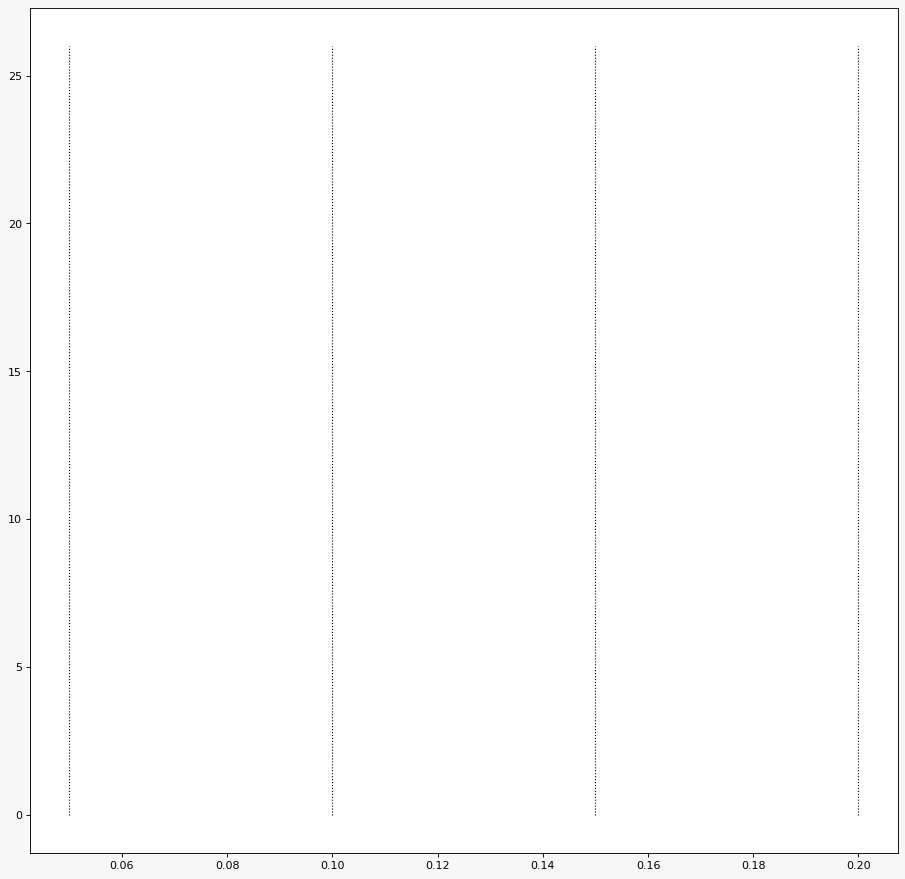

In [20]:
mortamidf = pd.DataFrame(cddf[cddf['Measure ID'].str.contains("MORT_30_AMI") == True])
mortamidf['Score'] = mortamidf['Score'].loc[mortamidf['Score'] != 'Not Available'].astype(float)
MORT_30_AMI = mortamidf['Score'].mean()

mortcabgdf = pd.DataFrame(cddf[cddf['Measure ID'].str.contains("MORT_30_CABG") == True])
mortcabgdf['Score'] = mortcabgdf['Score'].loc[mortcabgdf['Score'] != 'Not Available'].astype(float)
MORT_30_CABG = mortcabgdf['Score'].mean()

mortcopddf = pd.DataFrame(cddf[cddf['Measure ID'].str.contains("MORT_30_COPD") == True])
mortcopddf['Score'] = mortcopddf['Score'].loc[mortcopddf['Score'] != 'Not Available'].astype(float)
MORT_30_COPD = mortcopddf['Score'].mean()

morthfdf = pd.DataFrame(cddf[cddf['Measure ID'].str.contains("MORT_30_HF") == True])
morthfdf['Score'] = morthfdf['Score'].loc[morthfdf['Score'] != 'Not Available'].astype(float)
MORT_30_HF = morthfdf['Score'].mean()

mortpndf = pd.DataFrame(cddf[cddf['Measure ID'].str.contains("MORT_30_PN") == True])
mortpndf['Score'] = mortpndf['Score'].loc[mortpndf['Score'] != 'Not Available'].astype(float)
MORT_30_PN = mortpndf['Score'].mean()

mortstkdf = pd.DataFrame(cddf[cddf['Measure ID'].str.contains("MORT_30_STK") == True])
mortstkdf['Score'] = mortstkdf['Score'].loc[mortstkdf['Score'] != 'Not Available'].astype(float)
MORT_30_STK = mortstkdf['Score'].mean()

In [53]:
mortmeans = list([MORT_30_AMI, MORT_30_CABG, MORT_30_COPD, MORT_30_HF, MORT_30_PN, MORT_30_STK])
morts = list(["Acute Myocardial Infarction (AMI)", "Coronary Artery Bypass Graft", "Chronic Obstructive Pulmonary Disease", 
             "Heart Failure", "Pneumonia", "Stroke"])

mortmeansdf = pd.DataFrame({'Morts':morts, 'Mortmeans': mortmeans})
mortmeansdf

#mortmeansdf = pd.concat(morts, mortmeans)

,Morts,Mortmeans
0,Acute Myocardial Infarction (AMI),13.560601
1,Coronary Artery Bypass Graft,3.270474
2,Chronic Obstructive Pulmonary Disease,8.078684
3,Heart Failure,11.962745
4,Pneumonia,16.029747
5,Stroke,14.572158


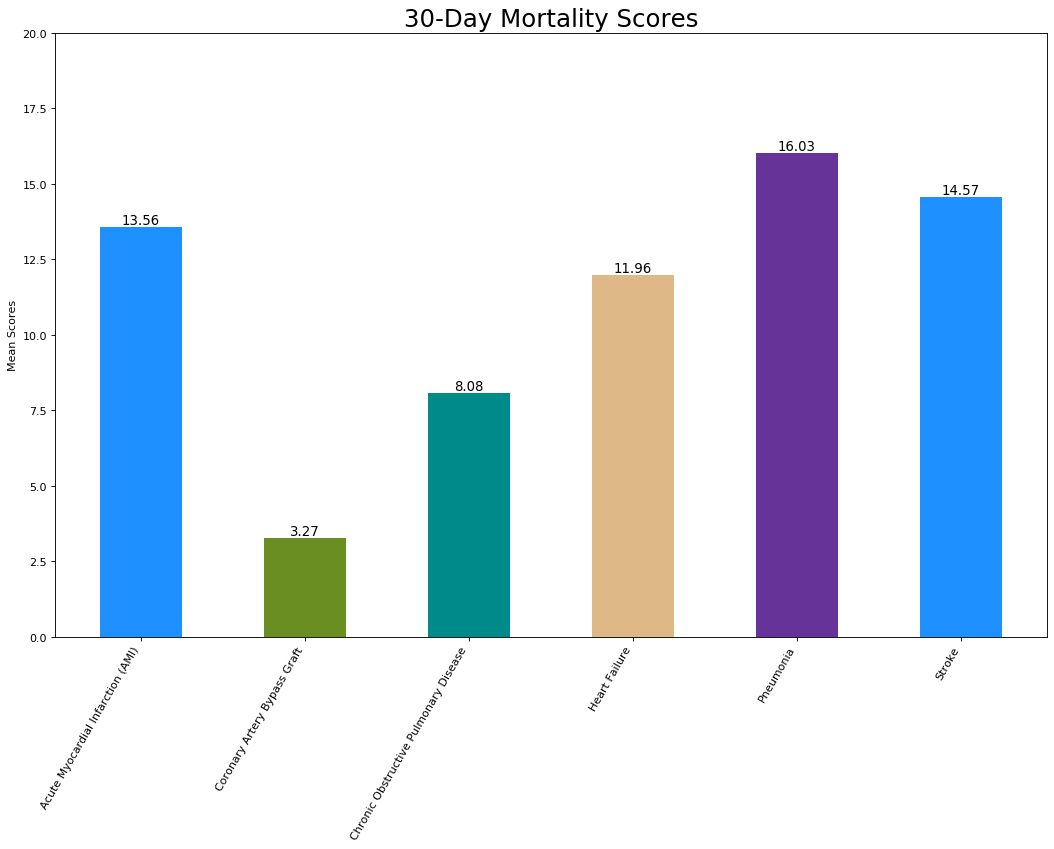

In [68]:
# Plot Bars
import random
plt.figure(figsize=(16,10), dpi= 80)
all_colors = list(plt.cm.colors.cnames.keys())
c = random.choices(all_colors, k=5)
plt.bar(mortmeansdf['Morts'], mortmeansdf['Mortmeans'], color=c, width=.5)
for i, val in enumerate(mortmeansdf['Mortmeans'].values):
    plt.text(i, val, round(float(val), 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})


# Decoration
plt.gca().set_xticklabels(mortmeansdf['Morts'], rotation=60, horizontalalignment= 'right')
plt.title("30-Day Mortality Scores", fontsize=22)
plt.ylabel('Mean Scores')
plt.ylim(0, 20)
plt.show()